In [93]:
import tensorflow as tf
import glob
import matplotlib.pyplot as plt

In [110]:
# Get a list of image paths
masks = glob.glob("./ISIC2018_Task1_Training_GroundTruth_x2/*.png")
images = glob.glob("./ISIC2018_Task1_2_Training_Input_x2/*.jpg")

In [111]:
# Sort the images, as glob doesn't gaurentee same ordering as files
masks.sort()
images.sort()

# Convert the list of strings into a 1d  string tensor
masksTf = tf.data.Dataset.from_tensor_slices(masks)
imagesTf = tf.data.Dataset.from_tensor_slices(images)

In [120]:
def load_jpeg(image):
    # Load the image turn into jpeg
    decoded = tf.io.read_file(image)
    imageTf = tf.image.decode_jpeg(decoded)
    # Normalize the images
    returnImage = tf.cast(imageTf, tf.float32) / 255.0
    return returnImage

def load_png(image):
    # Load the image turn into png
    decoded = tf.io.read_file(image)
    imageTf = tf.image.decode_png(decoded)
    return imageTf

In [121]:
masksTfImages = masksTf.map(load_png)
imagesTfImages = imagesTf.map(load_jpeg)

In [122]:
# Plots a given image and mask
def display(image, mask):
    plt.figure(figsize=(15, 15))
    plt.subplot(1,2,1)
    plt.imshow(tf.keras.preprocessing.image.array_to_img(image))
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(tf.keras.preprocessing.image.array_to_img(mask))
    plt.axis("off")
    plt.show()

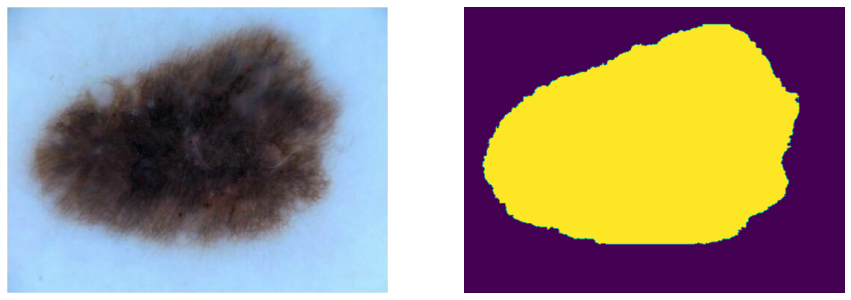

In [123]:
# Plot the images, namely to see if the plots tensor are properly configured
for imageTf in imagesTfImages.take(1):
    image = imageTf
for maskTf in masksTfImages.take(1):
    mask = maskTf

display(image, mask)

In [62]:
#Find the smallest image dimensions, and whether those dimensions are from seperate or the same image. 
minx = miny = 10000
seperate_images = True
for image in imagesTfImages:
    minxUpdated = False
    if image.shape[0] < minx:
        minx = image.shape[0]
        minxUpdated = True
    if image.shape[1] < miny:
        miny = image.shape[1]
        if minxUpdated:
            seperate_images = False
        
print(f"Min x: {minx}. Min y: {miny}. Seperate Images: {seperate_images}")

Min x: 270. Min y: 288. Seperate Images: False


In [79]:
# Reshape every image to have those dimensions. Include padding as position of the lesions may be important in classification
# Note that this may need to be changed later, maybe certain images of a certain aspect ratio have lesions in a certain position?
def resizeImages(image):
    return tf.image.resize_with_pad(image, 270, 288)

imagesResized = imagesTfImages.map(resizeImages)
masksResized = masksTfImages.map(resizeImages)

(270, 288, 3)


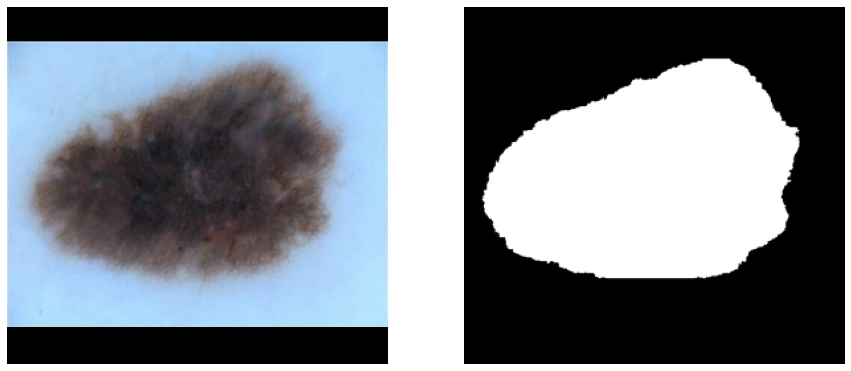

In [80]:
# Plot an image, check to se how they look after resize
for imageTf in imagesResized.take(1):
    image = imageTf
    print(imageTf.shape)
for maskTf in masksResized.take(1):
    mask = maskTf
    
display(image, mask)

In [ ]:
# Find bounding boxes of of each mask. 